In [1]:
import seaborn as sns
import pandas as pd
from scipy import stats

import scikit_posthocs as sp


In [2]:
df = pd.read_csv("ramen-ratings.csv")
df.head()


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [3]:
my_countries = ["Singapore", "Thailand", "Indonesia"]


In [4]:
df = df.loc[df["Country"].isin(my_countries)]


In [5]:
(df["Stars"] == "Unrated").sum()


0

In [6]:
df["Stars"] = df["Stars"].astype(float)


<AxesSubplot:xlabel='Country', ylabel='Stars'>

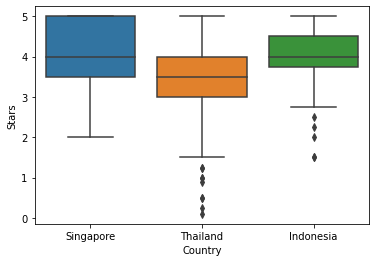

In [7]:
sns.boxplot(y=df["Stars"], x=df["Country"])


In [8]:
stats.shapiro(df.loc[df["Country"] == my_countries[0], "Stars"])


ShapiroResult(statistic=0.8938854336738586, pvalue=2.8951012609468307e-07)

In [9]:
stats.shapiro(df.loc[df["Country"] == my_countries[1], "Stars"])


ShapiroResult(statistic=0.927301287651062, pvalue=3.724644770386476e-08)

In [10]:
stats.shapiro(df.loc[df["Country"] == my_countries[2], "Stars"])


ShapiroResult(statistic=0.917570173740387, pvalue=1.044700525199005e-06)

In [11]:
stats.levene(
    df.loc[df["Country"] == my_countries[0], "Stars"],
    df.loc[df["Country"] == my_countries[1], "Stars"],
    df.loc[df["Country"] == my_countries[2], "Stars"],
)


LeveneResult(statistic=1.7079434889246727, pvalue=0.18248555811708173)

In [12]:
stats.kruskal(
    df.loc[df["Country"] == my_countries[0], "Stars"],
    df.loc[df["Country"] == my_countries[1], "Stars"],
    df.loc[df["Country"] == my_countries[2], "Stars"],
)


KruskalResult(statistic=67.2958052537159, pvalue=2.4372583196292058e-15)

In [13]:
sp.posthoc_dunn(
    [
        df.loc[df["Country"] == my_countries[0], "Stars"],
        df.loc[df["Country"] == my_countries[1], "Stars"],
        df.loc[df["Country"] == my_countries[2], "Stars"],
    ],
    p_adjust="fdr_bh",
)


,1,2,3
1,1.000000e+00,1.885972e-11,8.400982e-01
2,1.885972e-11,1.000000e+00,1.885972e-11
3,8.400982e-01,1.885972e-11,1.000000e+00


In [14]:
contingency_table = pd.crosstab(df["Stars"], df["Country"], margins=False)


In [15]:
_, pvalue, _, _ = stats.chi2_contingency(contingency_table)
print(pvalue)


1.0673909576139412e-08
